<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/GET_FII_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [32]:
content='https://raw.githubusercontent.com/anirbanghoshsbi/data/main/'

In [34]:
data1=pd.read_csv(content+'fii1.txt',sep='\t',header=None)
data2=pd.read_csv(content+'fii2.txt',sep='\t',header=None)
data3=pd.read_csv(content+'fii3.txt',sep='\t',header=None)
data4=pd.read_csv(content+'fii4.txt',sep='\t',header=None)
data5=pd.read_csv(content+'fii5.txt',sep='\t',header=None)
data6=pd.read_csv(content+'fii6.txt',sep='\t',header=None)
data7=pd.read_csv(content+'fii7.txt',sep='\t',header=None)
data8=pd.read_csv(content+'fii8.txt',sep='\t',header=None)


"\ndata2=pd.read_csv('/content/fii2.txt',sep='\t',header=None)\ndata3=pd.read_csv('/content/fii3.txt',sep='\t',header=None)\ndata4=pd.read_csv('/content/fii4.txt',sep='\t',header=None)\ndata5=pd.read_csv('/content/fii5.txt',sep='\t',header=None)\ndata6=pd.read_csv('/content/fii6.txt',sep='\t',header=None)\ndata7=pd.read_csv('/content/fii7.txt',sep='\t',header=None)\ndata8=pd.read_csv('/content/fii8.txt',sep='\t',header=None)\n"

In [4]:
data=[]

In [5]:
data=data1[0].tolist()
data.extend(data2[0].tolist())
data.extend(data3[0].tolist())
data.extend(data4[0].tolist())
data.extend(data5[0].tolist())
data.extend(data6[0].tolist())
data.extend(data7[0].tolist())
data.extend(data8[0].tolist())

In [6]:
len(data)

5040

In [7]:
lst=[]
lst.append(data[0:7])

In [8]:
for i in range(7,len(data)):
  if i%7==0:
    #print(i)
    lst.append(data[i:i+7])




In [9]:
df=pd.DataFrame()

In [10]:
for item in lst:
  to_append=item
  a_series = pd.Series(to_append)
  df = df.append(a_series, ignore_index=True)
print(df)

               0       1       2       3       4       5      6
0    16 Jul 2021  -15.3    21.5   -1109   11865    -466    666 
1    15 Jul 2021    9.6     4.1     706   11750    -265    439 
2    14 Jul 2021   -0.5     2.3     278   11312   -1304   1336 
3    13 Jul 2021   16.0   -69.8    2573   10981     114    344 
4    12 Jul 2021  -12.8   -10.0     719   11363    -746    447 
..           ...     ...     ...     ...     ...     ...    ...
715  20 Aug 2018    1.9    -5.6    -118   31185    -483    593 
716  17 Aug 2018   15.6     4.0    -695   30356     147    152 
717  16 Aug 2018   -8.9    11.6    -433   28720    -825    134 
718  14 Aug 2018    3.4     7.7    -711   28727    -379    391 
719  13 Aug 2018   -2.9     1.0    -722   28024    -972    216 

[720 rows x 7 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       720 non-null    object
 1   1       720 non-null    object
 2   2       720 non-null    object
 3   3       720 non-null    object
 4   4       720 non-null    object
 5   5       720 non-null    object
 6   6       720 non-null    object
dtypes: object(7)
memory usage: 39.5+ KB


In [14]:
df.to_csv('fii.csv')

In [15]:
fii_fig= pd.read_csv('/content/fii.csv')

In [16]:
fii_fig=fii_fig[::-1]

In [17]:
fii_fig.tail(2)

,Unnamed: 0,0,1.00,2.00,3.00,4.00,5.00,6.00
1,1,15-Jul-21,9.6,4.1,706.0,11750.0,-265.0,439.0
0,0,16-Jul-21,-15.3,21.5,-1109.0,11865.0,-466.0,666.0


In [18]:
fii_fig.columns =['Index','Date','FIIcall','FIIput','FIIFuture','FIIFutOI','FIICash','DIIcash']

In [19]:
fii_fig.drop('Index',inplace=True,axis=1)

In [20]:
fii_fig=fii_fig.set_index('Date')

In [21]:
fii_fig.tail(3)

,FIIcall,FIIput,FIIFuture,FIIFutOI,FIICash,DIIcash
Date,,,,,,
14-Jul-21,-0.5,2.3,278.0,11312.0,-1304.0,1336.0
15-Jul-21,9.6,4.1,706.0,11750.0,-265.0,439.0
16-Jul-21,-15.3,21.5,-1109.0,11865.0,-466.0,666.0


In [22]:
fii_fig['Cash']=fii_fig.FIICash+fii_fig.DIIcash

In [23]:
fii_fig['MA200']=fii_fig.FIICash.rolling(window=200).mean()
fii_fig['MA50']=fii_fig.FIICash.rolling(window=50).mean()

In [24]:
fii_fig['macd']=fii_fig['FIICash'].ewm(span=50, adjust=False).mean()-fii_fig['FIICash'].ewm(span=200, adjust=False).mean()
fii_fig['signal']=fii_fig['macd'].ewm(span=35,adjust=False).mean()
fii_fig['hist']=fii_fig['macd']-fii_fig['signal'] 

In [28]:
fii_fig['macd_dom']=fii_fig['DIIcash'].ewm(span=50, adjust=False).mean()-fii_fig['DIIcash'].ewm(span=200, adjust=False).mean()
fii_fig['signal_dom']=fii_fig['DIIcash'].ewm(span=35,adjust=False).mean()
fii_fig['hist_dom']=fii_fig['macd_dom']-fii_fig['signal_dom']

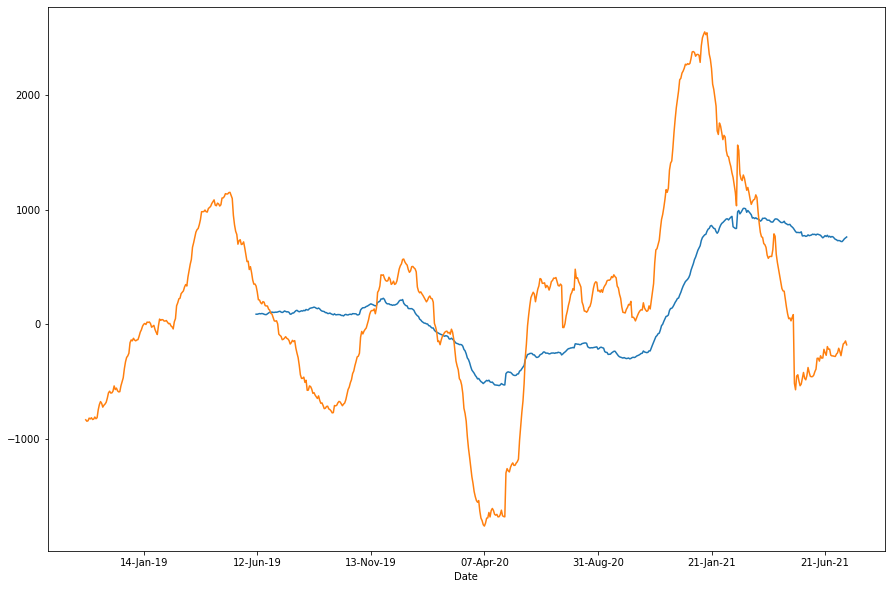

In [29]:
fii_fig.MA200.plot(figsize=(15,10))
fii_fig.MA50.plot()


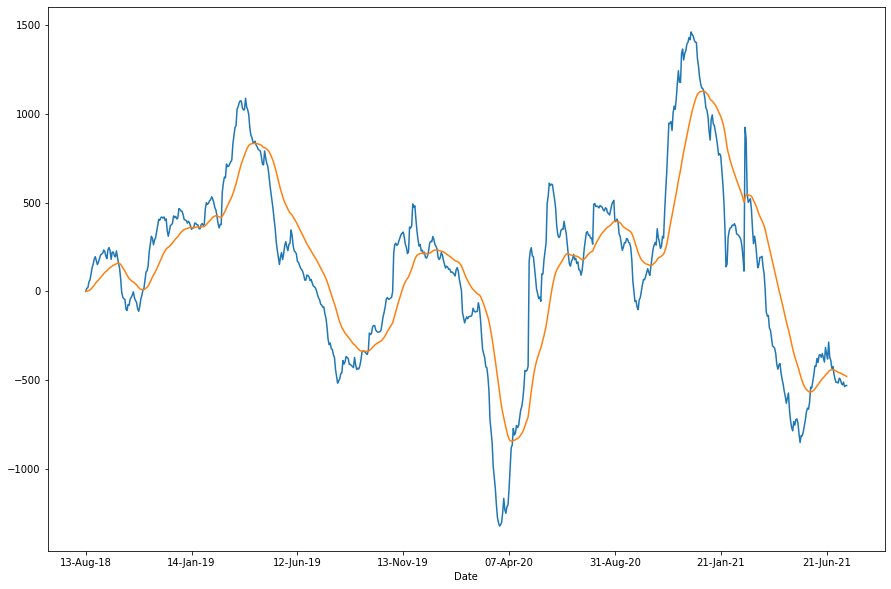

In [26]:
fii_fig.macd.plot(figsize=(15,10),xlabel='macd')
fii_fig.signal.plot()
plt.show()

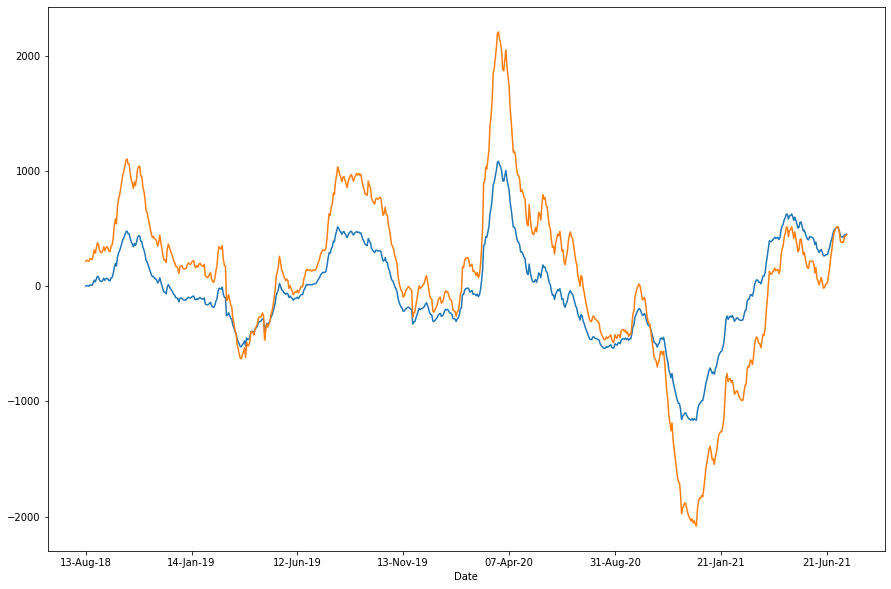

In [30]:
fii_fig.macd_dom.plot(figsize=(15,10),xlabel='macd')
fii_fig.signal_dom.plot()
plt.show()

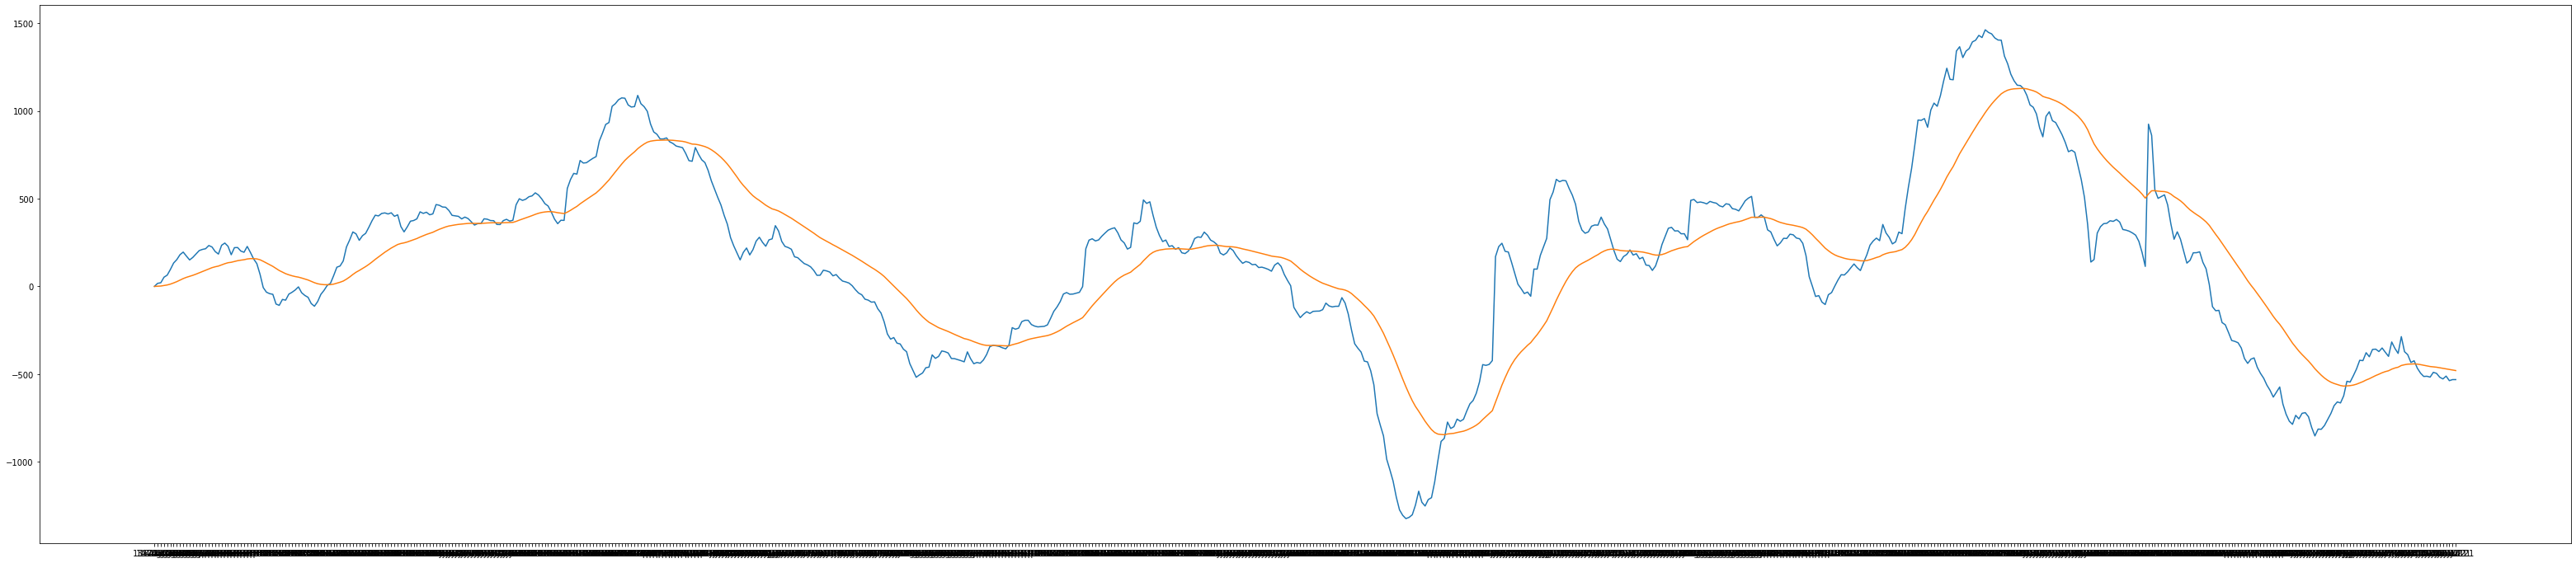

In [27]:
plt.figure(figsize=(55,12))
plt.plot(fii_fig.loc[:, :].index,fii_fig['macd'],label='MACD')
plt.plot(fii_fig.loc[:, :].index,fii_fig['signal'],label='Signal')
#plt.plot(fii_fig.loc[:, :].index)
plt.show()